In [54]:
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import TTestIndPower
from statsmodels.api import qqplot

## Data Preparation

In [3]:
df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## Z-test

In [4]:
z, p = proportions_ztest([30, 33], [1000, 1000], alternative="smaller")
z, p

(-0.3840618481549573, 0.35046630388746547)

## $\chi^2$ test

In [5]:
obs = [[15, 5], [15, 65]]
chi2, p, dof, ex = stats.chi2_contingency(obs, correction=False)
chi2, p, dof, ex

(24.107142857142858,
 9.112167294252327e-07,
 1,
 array([[ 6., 14.],
        [24., 56.]]))

## Z-test vs. $\chi^2$ test

In [6]:
column = "time"
value = "Dinner"

In [7]:
n = 50
samples1 = df[column].sample(n)
samples2 = df[column].sample(n)

- Z-test

In [8]:
count1 = samples1.value_counts()[value]
count2 = samples2.value_counts()[value]
z, p = proportions_ztest([count1, count2], [n, n], alternative="two-sided")
z, p

(0.20712325533373352, 0.8359136007500891)

In [9]:
if z<0:
    _, p_ = proportions_ztest([count1, count2], [n, n], alternative="smaller")
else:
    _, p_ = proportions_ztest([count1, count2], [n, n], alternative="larger")
p_*2

0.8359136007500891

- $\chi^2 test$

In [10]:
obs = np.array([samples1.value_counts().values, samples2.value_counts().values]).T
chi2, p, dof, ex = stats.chi2_contingency(obs, correction=False)
chi2, p, dof, ex

(0.0429000429000429,
 0.8359136007500891,
 1,
 array([[31.5, 31.5],
        [18.5, 18.5]]))

## t test

In [11]:
column = "tip_rate"

In [12]:
male_tips = df["tip_rate"][df["sex"]=="Male"]
female_tips = df["tip_rate"][df["sex"]=="Female"]

In [13]:
male_tips.mean(), female_tips.mean()

(0.15765054700429743, 0.16649073632892478)

In [14]:
male_tips.var(), female_tips.var()

(0.004196172792769981, 0.002876362058404039)

In [15]:
t_st, p_st = stats.ttest_ind(male_tips, female_tips, equal_var=True)
t_st, p_st

(-1.0833972270477996, 0.2797103849605489)

In [16]:
t_we, p_we = stats.ttest_ind(male_tips, female_tips, equal_var=False)
t_we, p_we

(-1.1432770167349968, 0.2542456188927583)

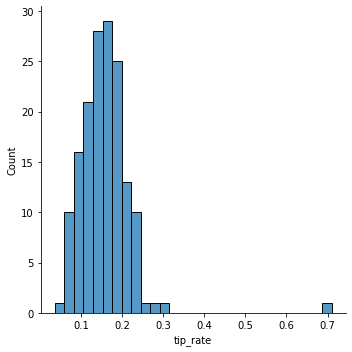

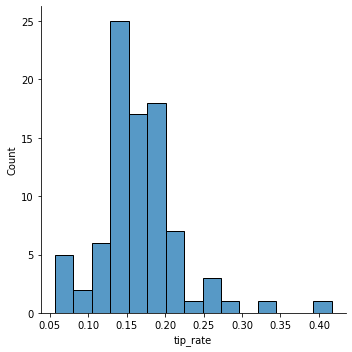

In [17]:
sns.displot(male_tips)
sns.displot(female_tips)

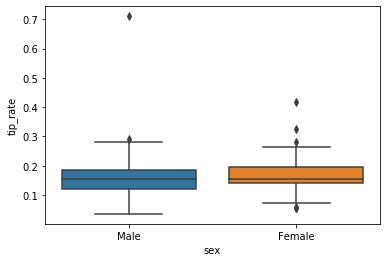

In [18]:
sns.boxplot(data=df, x="sex", y="tip_rate")

## Q-Q Plot

In [19]:
male_tipr = df[df["sex"]=="Male"]["tip_rate"]
female_tipr = df[df["sex"]=="Female"]["tip_rate"]

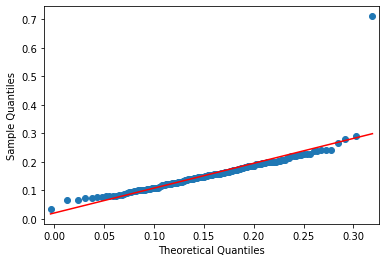

In [20]:
# sns.displot(male_tipr)
fig = qqplot(male_tipr,
             line="r",
             dist=stats.norm(loc=np.mean(male_tipr),
                             scale=np.sqrt(stats.tvar(male_tipr))))

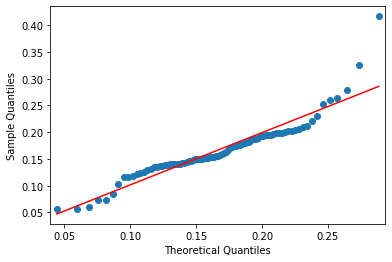

In [21]:
# sns.displot(female_tipr)
fig = qqplot(female_tipr,
             line="r",
             dist=stats.norm(loc=np.mean(female_tipr),
                             scale=np.sqrt(stats.tvar(female_tipr))))

## Shapiro Wilk test

In [22]:
stats.shapiro(male_tipr)

ShapiroResult(statistic=0.7447847127914429, pvalue=3.2243281107541917e-15)

In [23]:
stats.shapiro(female_tipr)

ShapiroResult(statistic=0.8982974290847778, pvalue=4.717996489489451e-06)

In [24]:
stats.shapiro(np.sort(male_tipr)[:-1])

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

In [25]:
stats.shapiro(np.sort(female_tipr)[:-2])

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)

## F distribution

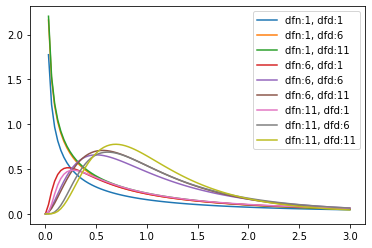

In [26]:
x = np.linspace(0, 3, 100)
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f(dfn, dfd).pdf(x)
        plt.plot(x, y, label=f"dfn:{dfn}, dfd:{dfd}")
plt.legend()

## F test

In [27]:
dof_male = len(male_tipr) - 1
dof_female = len(female_tipr) - 1

In [28]:
f = stats.tvar(male_tipr) / stats.tvar(female_tipr)
f

1.4588472200534603

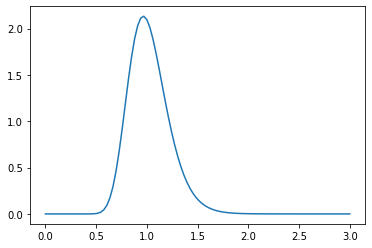

In [29]:
x = np.linspace(0, 3, 100)
y = stats.f(dof_male, dof_female).pdf(x)
plt.plot(x, y)

0.027100863454374447

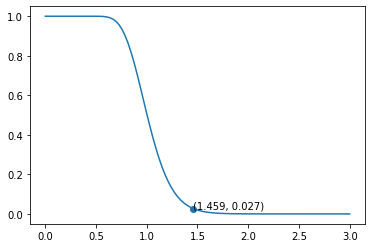

In [30]:
x = np.linspace(0, 3, 100)
y = stats.f(dof_male, dof_female).sf(x)
plt.plot(x, y)
p = stats.f(dof_male, dof_female).sf(f)
pos = f"({str(np.round(f,3))}, {str(np.round(p,3))})"
plt.scatter([f], [p], label=pos)
plt.text(f, p, pos)
p

## t test (related dataset)

In [31]:
path = "./blood_pressure.csv"

In [32]:
bp_df = pd.read_csv(path)

In [33]:
stats.ttest_rel(bp_df["bp_before"], bp_df["bp_after"], alternative="greater")

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0005648957322420411)

In [34]:
bp_df["bp_before"].mean()

156.45

In [35]:
bp_df["bp_after"].mean()

151.35833333333332

In [36]:
bp_df["delta"] = bp_df["bp_before"] - bp_df["bp_after"]

In [37]:
bp_df["delta"].mean()

5.091666666666667

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


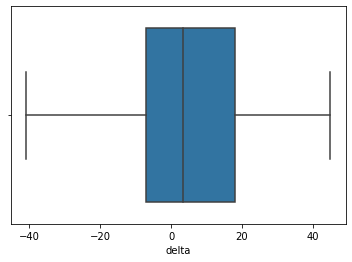

In [38]:
sns.boxplot(bp_df["delta"])

## Cohen's d

In [52]:
def cohen_d(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    dfx = len(x) - 1
    dfy = len(y) - 1
    varx = stats.tvar(x)
    vary = stats.tvar(y)
    std = np.sqrt((dfx*varx+dfy*vary)/(dfx+dfy))
    d = np.abs(meanx - meany) / std
    return d

In [40]:
x = df[df["sex"]=="Male"]["tip_rate"]
y = df[df["sex"]=="Female"]["tip_rate"]

In [57]:
d = cohen_d(x, y)
d

0.14480153987269387

## Power Analysis

In [72]:
stats.ttest_ind(x, y, equal_var=False)

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583)

In [55]:
power = TTestIndPower()

In [61]:
power.solve_power(d, len(x), 0.05, None, len(y)/len(x), "two-sided")

0.19038260700802495

In [73]:
power.solve_power(d, None, 0.05, 0.8, len(y)/len(x), "two-sided")

1051.0959553846437

In [75]:
power.solve_power(0.2, None, 0.05, 0.8, 1.0, "two-sided")

393.4056989990335

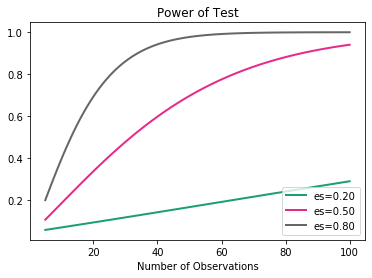

In [83]:
sample_size = np.arange(5, 101)
fig = power.plot_power("nobs", sample_size, [0.2, 0.5, 0.8], 0.05)